In [6]:
pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd
df = pd.read_csv("C:\\Users\\HP\\Downloads\\myexcel.csv")

In [16]:
import numpy as np
df['height'] = np.random.randint(150, 181, df.shape[0])

In [18]:
print(df.isnull().sum())  # Identify missing values
df.dropna(inplace=True)   # Remove missing values if needed

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
height       0
dtype: int64


In [20]:
df.to_csv("cleaned_data.csv", index=False)

In [24]:
df = pd.read_csv("cleaned_data.csv")

In [28]:
print(df.head())

            Name            Team  Number Position  Age  Height  Weight  \
0  Avery Bradley  Boston Celtics       0       PG   25  06-Feb     180   
1    Jae Crowder  Boston Celtics      99       SF   25  06-Jun     235   
2    R.J. Hunter  Boston Celtics      28       SG   22  06-May     185   
3  Jordan Mickey  Boston Celtics      55       PF   21  06-Aug     235   
4   Kelly Olynyk  Boston Celtics      41        C   25     7-0     238   

         College     Salary  height  
0          Texas  7730337.0     180  
1      Marquette  6796117.0     176  
2  Georgia State  1148640.0     158  
3            LSU  1170960.0     159  
4        Gonzaga  2165160.0     174  


In [32]:
print(df.tail())

              Name       Team  Number Position  Age  Height  Weight   College  \
360  Chris Johnson  Utah Jazz      23       SF   26  06-Jun     206    Dayton   
361     Trey Lyles  Utah Jazz      41       PF   20  06-Oct     234  Kentucky   
362   Shelvin Mack  Utah Jazz       8       PG   26  06-Mar     203    Butler   
363    Jeff Withey  Utah Jazz      24        C   26     7-0     231    Kansas   
364       Priyanka  Utah Jazz      34        C   25  07-Mar     231    Kansas   

        Salary  height  
360   981348.0     171  
361  2239800.0     161  
362  2433333.0     168  
363   947276.0     180  
364   947276.0     172  


In [36]:
team_distribution = df['Team'].value_counts()
team_percentage = (team_distribution / len(df)) * 100
print("Employee Distribution by Team:\n", team_distribution)
print("\nPercentage Split:\n", team_percentage)

Employee Distribution by Team:
 Team
New Orleans Pelicans      16
Portland Trail Blazers    15
Detroit Pistons           15
Milwaukee Bucks           14
Philadelphia 76ers        14
Oklahoma City Thunder     14
Los Angeles Clippers      14
Washington Wizards        13
Charlotte Hornets         13
Phoenix Suns              13
Sacramento Kings          13
Memphis Grizzlies         13
Brooklyn Nets             13
Boston Celtics            12
Dallas Mavericks          12
Indiana Pacers            12
Chicago Bulls             12
Los Angeles Lakers        12
Golden State Warriors     12
Houston Rockets           11
Cleveland Cavaliers       11
San Antonio Spurs         11
Atlanta Hawks             11
New York Knicks           11
Utah Jazz                 11
Miami Heat                10
Orlando Magic             10
Toronto Raptors           10
Denver Nuggets             9
Minnesota Timberwolves     8
Name: count, dtype: int64

Percentage Split:
 Team
New Orleans Pelicans      4.383562
Portlan

In [46]:
position_distribution = df['Position'].value_counts()
print("Employee Distribution by Position:\n", position_distribution)

Employee Distribution by Position:
 Position
SG    87
PF    81
PG    76
SF    71
C     50
Name: count, dtype: int64


In [50]:
df['age_group'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60], labels=['20-30', '30-40', '40-50', '50-60'])
age_group_distribution = df['age_group'].value_counts()


In [52]:
print("Age Group Distribution:\n", age_group_distribution)

Age Group Distribution:
 age_group
20-30    284
30-40     64
40-50      0
50-60      0
Name: count, dtype: int64


In [56]:
highest_salary_team = df.groupby('Team')['Salary'].sum().idxmax()
highest_salary_position = df.groupby('Position')['Salary'].sum().idxmax()

In [58]:
print("Team with Highest Salary Expenditure:", highest_salary_team)
print("Position with Highest Salary Expenditure:", highest_salary_position)

Team with Highest Salary Expenditure: Los Angeles Clippers
Position with Highest Salary Expenditure: PG


In [62]:
correlation = df[['Age', 'Salary']].corr()

In [64]:
print("Correlation Between Age and Salary:\n", correlation)

Correlation Between Age and Salary:
              Age    Salary
Age     1.000000  0.159992
Salary  0.159992  1.000000


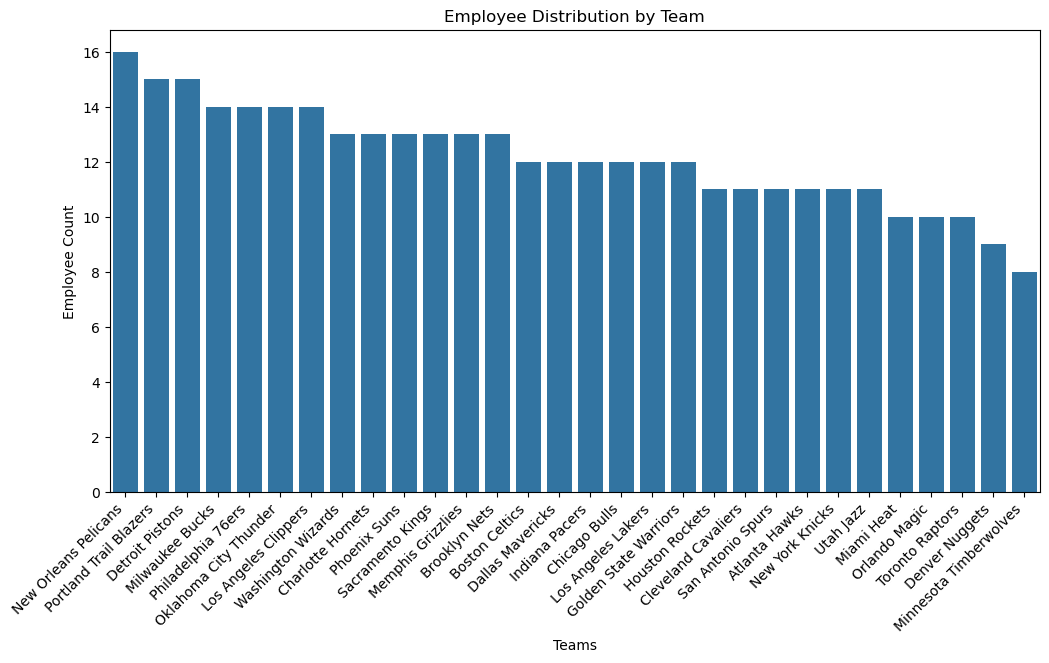

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))  
sns.barplot(x=team_distribution.index, y=team_distribution.values)
plt.title("Employee Distribution by Team")

plt.xticks(rotation=45, ha='right')  

plt.xlabel("Teams")
plt.ylabel("Employee Count")

plt.show()


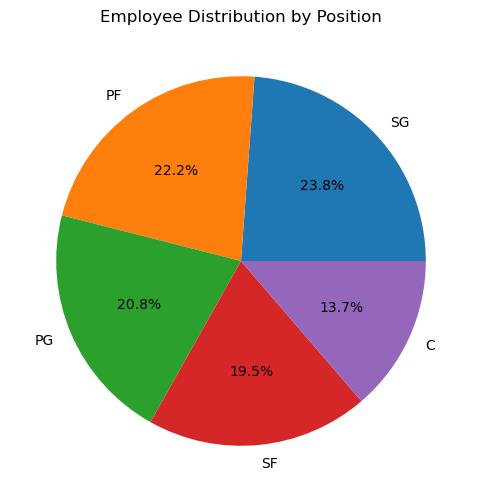

In [70]:
plt.figure(figsize=(6,6))
plt.pie(position_distribution, labels=position_distribution.index, autopct='%1.1f%%')
plt.title("Employee Distribution by Position")
plt.show()

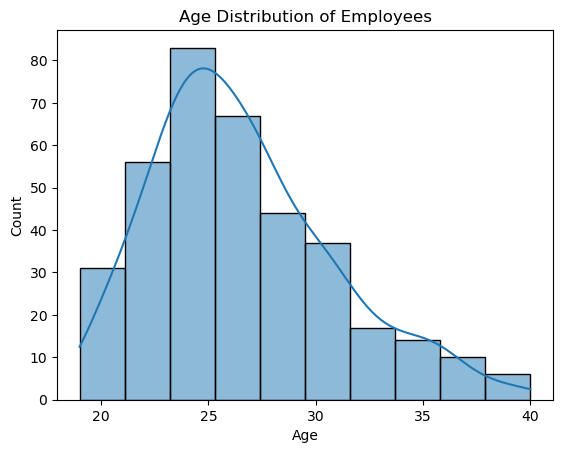

In [74]:
sns.histplot(df['Age'], bins=10, kde=True)
plt.title("Age Distribution of Employees")
plt.show()

In [134]:
lowest_salary_team = df.groupby('Team')['Salary'].sum().idxmin()
highest_salary_team = df.groupby('Team')['Salary'].sum().idxmax()
highest_salary_position = df.groupby('Position')['Salary'].sum().idxmax()


In [136]:
print(lowest_salary_team)
print("Team with Highest Salary Expenditure:", highest_salary_team)
print("Position with Highest Salary Expenditure:", highest_salary_position)

Minnesota Timberwolves
Team with Highest Salary Expenditure: Los Angeles Clippers
Position with Highest Salary Expenditure: PG


In [140]:
lowest_salary_position = df.groupby('Position')['Salary'].sum().idxmin()
print(lowest_salary_position)

C


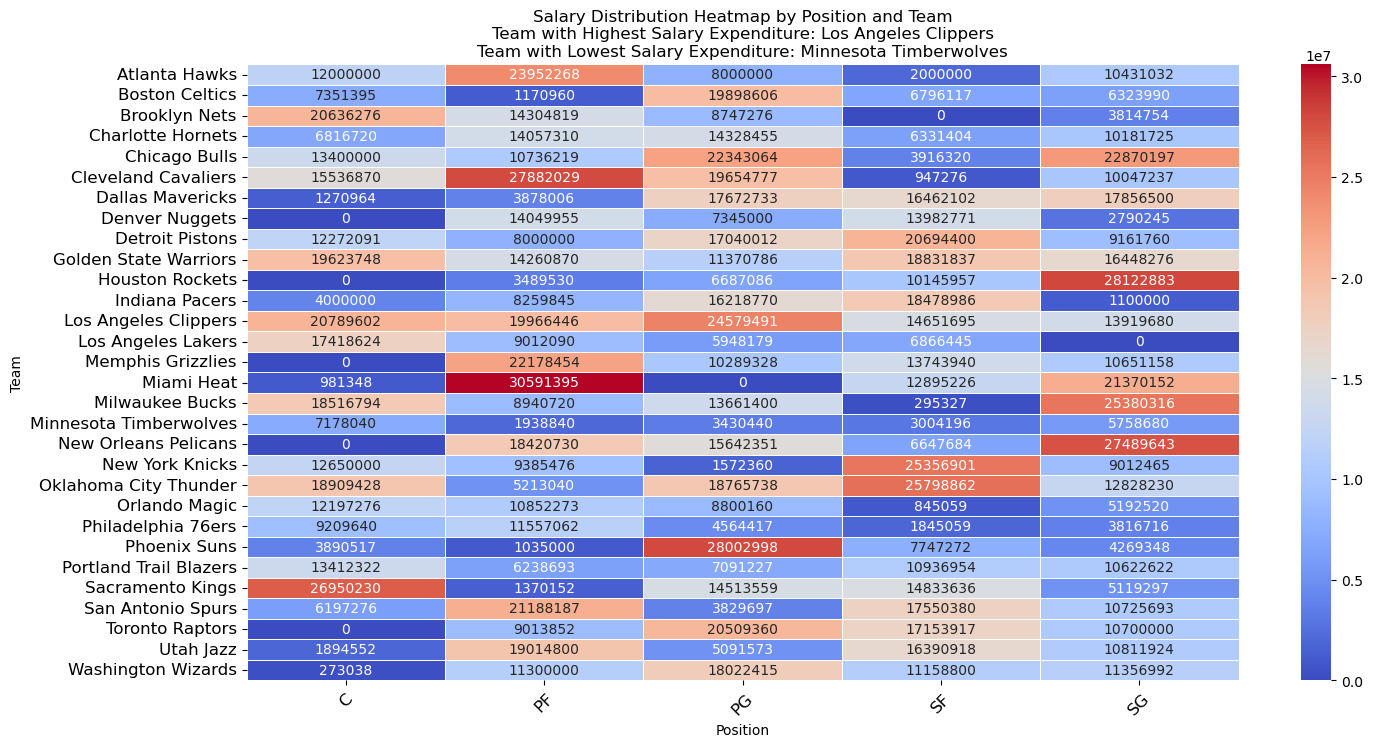

In [114]:
# Pivot the data for heatmap visualization
heatmap_data = df.pivot_table(index='Team', columns='Position', values='Salary', aggfunc='sum', fill_value=0)

# Set the figure size
plt.figure(figsize=(16, 8))

# Create a heatmap
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)
plt.title(f"Salary Distribution Heatmap by Position and Team\nTeam with Highest Salary Expenditure: {highest_salary_team}\nTeam with Lowest Salary Expenditure: {lowest_salary_team}")
plt.xlabel("Position")
plt.ylabel("Team")
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.show()



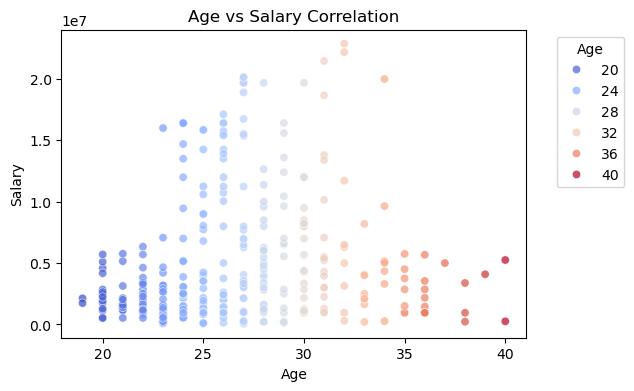

In [122]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['Age'], y=df['Salary'], hue=df['Age'], palette='coolwarm', edgecolor='w', alpha=0.7)
plt.title("Age vs Salary Correlation")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.legend(title="Age", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()